In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
%matplotlib inline

In [2]:
# initializing constants
K = 0.06    #liquid conductivity
s = 20.     #solid conductivity
a = 23300.  #area/volume
ac = 0.5    #alpha cathode
aa = 0.5    #alpha anode
io = 2e-7   #exchange current density
L = 1.      #length
n = 1       #exchanged electrons
F = 96485   #Faraday's constant
R = 8.314   #gas constant
T = 298     #temperature
I = 0.1     #total current density


#graph analytically
X = np.linspace(0., L, 200)
Y=y = X/L
v = L*np.sqrt(a*io*(n*F)/(R*T)*(K + s)/(K*s))
i2 = I * K/(K + s)*(1 + (s*(K**-1)*np.sinh(v*(1-y)) - np.sinh(v*y))/np.sinh(v))

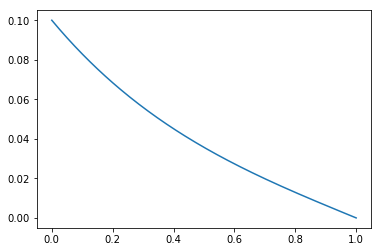

In [3]:
plt.plot(X, i2)

In [4]:
#solve numerically

#analytically combined equation
def simplebattfunc(i, x):
    i0, i1 = i
    di = i1
    d2i = a*io*(n*F)/(R*T)*(-I/s + i0*(1/s + 1/K))
    return di, d2i

#systems of differential equations with drop-in replacements possible
def linearbattfunc(x, IV):
    i1, i2, V1, V2 = IV
    di2 = a*io*(n*F)/(R*T)*(V1 - V2)
    di1 = -di2
    dV1 = -i1/s
    dV2 = -i2/K
    return di1, di2, dV1, dV2



def BVbattfunc(x, IV):
    i1, i2, V1, V2 = IV
    di2 = a*io*(np.exp((n*F)/(R*T)*aa*(V1 - V2)) - np.exp((n*F)/(R*T)*-ac*(V1 - V2)))
#     di2 = a*io*(n*F)/(R*T)*(V1 - V2)
    di1 = -di2
    dV1 = -i1/s
    dV2 = -i2/K
    return di1, di2, dV1, dV2

def Tafelfunc(IV, x):
    """
    uses Tafel kinetics
    """
    i1, i2, V1, V2 = IV
    
    taff = -ac*n*F/(R*T)*(V1-V2)
    
    #di2 = -a*io*np.exp(-ac*n*F/(R*T)*(V1 - V2))
    di2 = -a*io*np.exp(taff)
    #di2 = -a*io*(1 + taff + (taff**2)/2 + (taff**3)/6 + (taff**4)/24 + (taff**5)/120 + (taff**6)/720)
    di1 = -di2
    dV1 = -i1/s
    dV2 = -i2/K
    
    return di1, di2, dV1, dV2

In [5]:
# def objective(u2_0):
#     """
#     The thing we want to set equal to zero
#     """
#     U = odeint(simplebattfunc, [I, u2_0], X)
# #     print(U[-1,0])
#     return U[-1,0]

# def objectiveLinear(V2o):
#     """
#     Shooting method for solving linear kinetic system
#     """
#     V = odeint(linearbattfunc, [0., I, 0., V2o], X)
#     dV = np.diff(V[:,3])/np.diff(X)
# #     print(dV[-1])
#     return dV[-1]

# def objectiveBV(V2o):
#     """
#     Shooting method for solving Butler-Volmer kinetics system (Tafel)
#     """
#     V = odeint(BVbattfunc, [0., I, 0., V2o], X)
#     dV = np.diff(V[:,3])/np.diff(X)
# #     print(dV[-1])
#     return dV[-1]

# def ObjectiveTafel(IVo):
#     """
#     Solves initial condition for tafel kinetic problem
#     """
#     i1o, V2o = IVo
#     U = odeint(Tafelfunc, [i1o, I, 0, V2o], X)
#     V = U[:,3]
#     dV = np.diff(V)/np.diff(X)
#     print(i1o, V2o)
    
#     return U[0,0], dV[-1]

In [6]:
# u2_0, = fsolve(objective, 0.)
# simple_i = odeint(simplebattfunc, [I, u2_0], X)
# # simple_i1 = I - simple_i[:,0]

# # linear_V2_0 = fsolve(objectiveLinear, 0.)
# # linear_IV = odeint(linearbattfunc, [0., I, 0., linear_V2_0], X) #, full_output = 1)

# # BV_i1_0, BV_V2_0 = fsolve(bjectiveTafel, [0,0])
# # BV_IV = odeint(BVbattfunc, [0., I, 0, BV_V2_0], X)
# T_i1o, T_V2o = fsolve(ObjectiveTafel, [0.1, 0.299], maxfev = 50)
# T_IV = odeint(Tafelfunc, [T_i1o, I, 0, T_V2o], X) #, full_output = 1)
# # print(T_IV)

# # plt.plot(X, simple_i[:,0], label = 'ionic linear simple')
# # plt.plot(X, simple_i1, label = 'electronic linear simple')

# plt.figure()
# # plt.plot(X, linear_IV[:,0], '--', color = 'r', label = 'electronic linear')
# # plt.plot(X, linear_IV[:,1], '--',color = 'b' ,label = 'ionic linear')
# plt.plot(X, T_IV[:,0], color = 'r', label = 'electronic Tafel')
# plt.plot(X, T_IV[:,1], color = 'b', label = 'ionic Tafel')
# plt.plot(X, T_IV[:,2], color = 'r', label = 'electronic Tafel')
# plt.plot(X, T_IV[:,3], color = 'b', label = 'ionic Tafel')

# plt.legend(loc = 'best')

In [7]:
def Tafelfunc(IV, x):
    """
    uses Tafel kinetics
    """
    i1, i2, V1, V2 = IV
    
    di2 = -a*io*np.exp(-ac*n*F/(R*T)*(V1 - V2))
    di1 = -di2
    dV1 = -i1/s
    dV2 = -i2/K
    
    return di1, di2, dV1, dV2

def ObjectiveTafel(IVo):
    """
    Solves initial condition for tafel kinetic problem
    """
    i1o, V2o = IVo
    U = odeint(Tafelfunc, [i1o, I, 0, V2o], X)
    V = U[:,3]
    dV = np.diff(V)/np.diff(X)
    
    return U[0,0], dV[-1]

In [8]:
from scipy.integrate import solve_bvp

def BC(ya, yb):
    return (yb[0] - I), (ya[1] - I), ya[2], yb[1]

def linearbattfunc(x, IV):
    i1, i2, V1, V2 = IV
    di2 = a*io*(n*F)/(R*T)*(V1 - V2)
    di1 = -di2
    dV1 = -i1/s
    dV2 = -i2/K
    return di1, di2, dV1, dV2

def Tafelfunc(x, IV):
    """
    uses Tafel kinetics
    """
    i1, i2, V1, V2 = IV
    
    taff = -ac*n*F/(R*T)*(V1-V2)
    
    #di2 = -a*io*np.exp(-ac*n*F/(R*T)*(V1 - V2))
    di2 = -a*io*np.exp(taff)
    #di2 = -a*io*(1 + taff + (taff**2)/2 + (taff**3)/6 + (taff**4)/24 + (taff**5)/120 + (taff**6)/720)
    di1 = -di2
    dV1 = -i1/s
    dV2 = -i2/K
    
    return di1, di2, dV1, dV2

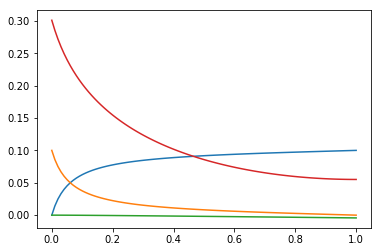

In [9]:
x = np.linspace(0, L, 10)
y = np.zeros([4,10])
y[:,0] = [0., I, .1, .1]
y[:,-1] = [I, 0., .1, .1]

linear_IV = solve_bvp(BVbattfunc, BC, x, y)

x_plot = np.linspace(0, L, 100)

for i in range(4):
#     plt.plot(x, y[i])
    plt.plot(x_plot, linear_IV.sol(x_plot)[i])